<a href="https://colab.research.google.com/github/sheheryarsalman/2048/blob/master/Paid_vs_Unpaid_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
paid_unpaid = pd.read_csv('classes_cleanedv3.csv')

In [ ]:
# Crearting DataFrame with data filtered for paid vs. unpaid classes (yoga/yoga£2, pilates/pilates£2)

filtered_classes = paid_unpaid[paid_unpaid['class_name'].isin(['pilates', 'yoga', 'pilates £2', 'yoga £2'])]


print(filtered_classes)

        booking_id class_name  center_id      state  class_capacity  \
1981  174book62801       yoga        174     ACTIVE              30   
1982  174book62801       yoga        174     ACTIVE              30   
1983  174book62802       yoga        174     ACTIVE              30   
1984  174book62802       yoga        174     ACTIVE              30   
1985  174book62802       yoga        174     ACTIVE              30   
...            ...        ...        ...        ...             ...   
6524  264book34961    yoga £2        264     ACTIVE              12   
6525  264book34961    yoga £2        264     ACTIVE              12   
6526  264book34962    yoga £2        264  CANCELLED              12   
6527  264book34963    yoga £2        264  CANCELLED              12   
6528  264book34964    yoga £2        264  CANCELLED              12   

     participation_status  female  male  unknown  age_16_17  ...  offpeak_SS  \
1981            CANCELLED       2     0        0          0  ...   

In [ ]:
# Checking class count for each
class_counts = filtered_classes['class_name'].value_counts()

print(class_counts)

yoga          179
pilates        59
yoga £2        37
pilates £2     33
Name: class_name, dtype: int64


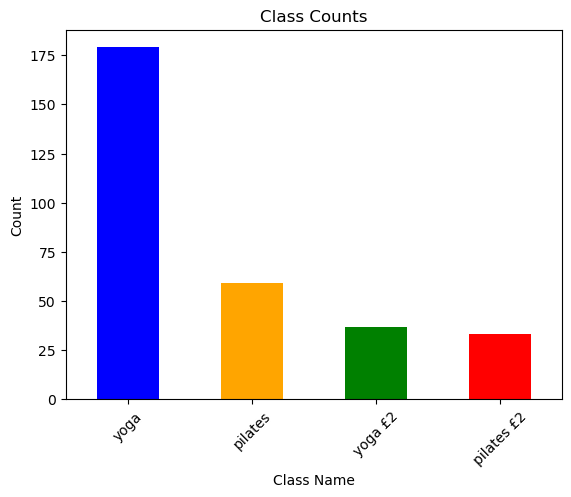

In [ ]:
# Plotting data
class_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])

plt.title('Class Counts')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Group by 'class_name' and 'participation status', then count occurrences
status_counts = filtered_classes.groupby(['class_name', 'participation_status']).size().unstack(fill_value=0)

status_counts

participation_status,ATTENDED,BOOKED,CANCELLED,NO SHOW,WAITING LIST
class_name,,,,,
pilates,19,4,22,13,1
pilates £2,13,1,14,5,0
yoga,47,23,50,42,17
yoga £2,15,1,17,4,0


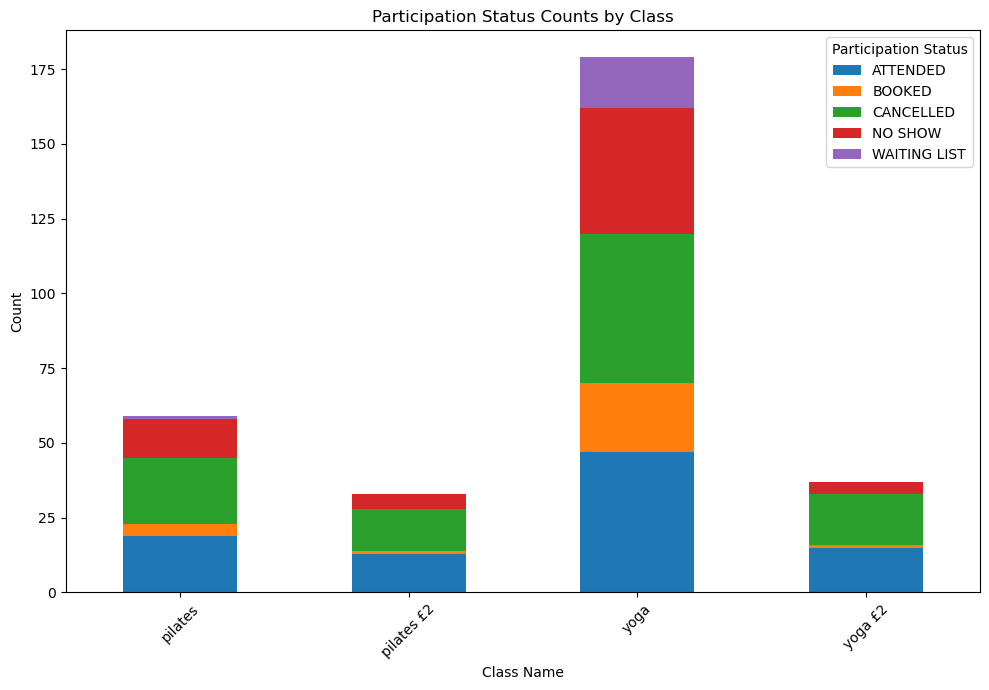

In [ ]:
# Visualising participation status by class name
status_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Participation Status Counts by Class')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Participation Status')
plt.tight_layout()
plt.show()

In [ ]:
# Filter rows where participation_status is 'ATTENDED'
attended_classes = filtered_classes[filtered_classes['participation_status'] == 'ATTENDED']

# Group by 'class_name' and count the occurrences
attendance_counts = attended_classes.groupby('class_name').size()

print(attendance_counts)

class_name
pilates       19
pilates £2    13
yoga          47
yoga £2       15
dtype: int64


In [ ]:
# Calculate the total attendance per class including the breakdown
attendance_details = attended_classes.groupby('class_name').agg({
    'female': 'sum',
    'male': 'sum',
    'unknown': 'sum',
    # Add all age columns that you want to sum up
    'age_16_17': 'sum',
    'age_18_22': 'sum',
    'age_23_28': 'sum',
    'age_29_34': 'sum',
    'age_35_44': 'sum',
    'age_over_45': 'sum',
})

attendance_details

,female,male,unknown,age_16_17,age_18_22,age_23_28,age_29_34,age_35_44,age_over_45
class_name,,,,,,,,,
pilates,161,4,3,0,27,68,22,12,39
pilates £2,62,10,5,4,12,19,11,14,17
yoga,672,149,0,0,83,297,155,116,170
yoga £2,38,13,0,0,6,0,6,2,37


In [ ]:
# Group by 'class_name' and sum up the 'female', 'male', and 'unknown' columns
total_attendees = attended_classes.groupby('class_name')[['female', 'male', 'unknown']].sum()

# Add a new column for total attendees
total_attendees['total'] = total_attendees.sum(axis=1)

print(total_attendees['total'])

class_name
pilates       168
pilates £2     77
yoga          821
yoga £2        51
Name: total, dtype: int64


It is interesting to see that out of all classes yoga is popular with men more than any other class.

Also, group over 35 is significantly high, what support argument of potential for utilising this class in off peak for older clients.

Regular Pilates class has significantly more female participants and overall attendees than the Pilates £2 class. The age groups with the highest participation are 23-28 for regular Pilates and a more dispersed distribution for Pilates £2.

Regular Yoga class showing a much higher overall attendance than the Yoga £2 class. Again, female participants dominate, especially in the regular Yoga class. The age group 23-28 has the highest participation in regular Yoga, while the Yoga £2 class has a significant number of participants over 35, despite the smaller overall numbers.

The £2 pricing tier seems to attract fewer participants across both Pilates and Yoga. There's a significant gender disparity, with female participants overwhelmingly outnumbering male participants in all classes, which is common in Pilates and Yoga.
The most active age groups vary between classes, but ages 23-28 seem particularly engaged in Yoga. Pilates attracts a broader age range, but still predominantly younger adults.
Data Accuracy Concern: The overlapping age categories (age_35_44 and age_over_35) might indicate a need to clarify or correct the data categorization for accurate analysis.

In [ ]:
# Group by 'class_name' and aggregate the unique 'class_capacity' values for each class
capacity_options = filtered_classes.groupby('class_name')['class_capacity'].unique().reset_index()

# Show the options for class capacity for each class
print(capacity_options)

# Count how many times each capacity appears for each class
capacity_counts = filtered_classes.groupby('class_name')['class_capacity'].value_counts()

capacity_counts

   class_name class_capacity
0     pilates       [30, 12]
1  pilates £2       [30, 12]
2        yoga           [30]
3     yoga £2           [12]


class_name  class_capacity
pilates     30                 57
            12                  2
pilates £2  30                 30
            12                  3
yoga        30                179
yoga £2     12                 37
Name: class_capacity, dtype: int64

Pilates & Pilates £2 have two session types or perhaps classes at different times or locations, with capacities of 30 and 12 participants, respectively.
Yoga has a single class capacity of 30 participants. This larger capacity is in line with the higher number of total participants in yoga classes seen in the previous data.
Yoga £2 has a significantly smaller class capacity of only 12 participants. This smaller capacity might explain the lower number of total participants compared to the regular Yoga class.

In [ ]:
# Checking average attendance per class
# Sum the 'female' and 'male' columns for each class_name to get the total attendance per class
attendance_sum = attended_classes.groupby('class_name')[['female', 'male', 'unknown']].sum().sum(axis=1)

# Count the number of attended sessions for each class_name
session_counts = attended_classes.groupby('class_name').size()

# Divide the total attendance by the number of attended sessions to get the average attendance per class
average_attendance = attendance_sum / session_counts

print(average_attendance)

class_name
pilates        8.842105
pilates £2     5.923077
yoga          17.468085
yoga £2        3.400000
dtype: float64


In [ ]:
# Sum the 'female' and 'male' columns for each class_name to get the total attendance per class
attendance_sum = attended_classes.groupby('class_name')[['female', 'male', 'unknown']].sum().sum(axis=1)

session_sum = filtered_classes.groupby('class_name')[['female', 'male', 'unknown']].sum().sum(axis=1)
attendance_percentage = attendance_sum / session_sum

attendance_percentage

class_name
pilates       0.461538
pilates £2    0.596899
yoga          0.523931
yoga £2       0.531250
dtype: float64

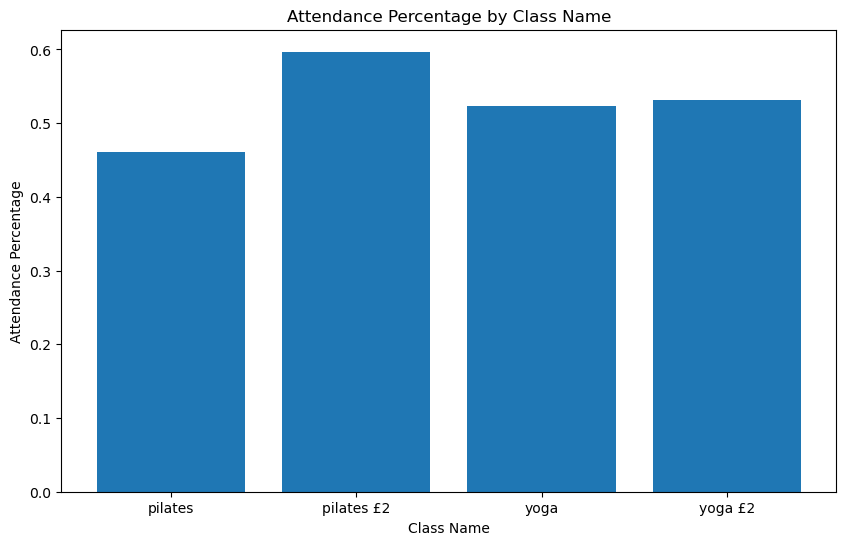

In [ ]:
# Convert the Series to a DataFrame for easier plotting
attendance_percentage_df = attendance_percentage.reset_index()
attendance_percentage_df.columns = ['class_name', 'attendance_percentage']

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(attendance_percentage_df['class_name'], attendance_percentage_df['attendance_percentage'])

# Add title and labels
plt.title('Attendance Percentage by Class Name')
plt.xlabel('Class Name')
plt.ylabel('Attendance Percentage')

# Show the plot
plt.show()

Results show that out of all clients that signed up for the class, this percentage attended.

In [ ]:
# Attendance Analysis
# We could calculate the average attendance rate by dividing the sum of attendees by the class capacity
filtered_classes['attendance_rate'] = filtered_classes.apply(
    lambda row: (row['female'] + row['male'] + row['unknown']) / row['class_capacity'], axis=1)
attendance_summary = filtered_classes.groupby(['class_name', 'center_id'])['attendance_rate'].mean().reset_index()

# Show result
attendance_summary

C:\Users\alicja.walaszek\AppData\Local\Temp\ipykernel_10432\1854224341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_classes['attendance_rate'] = filtered_classes.apply(


,class_name,center_id,attendance_rate
0,pilates,174,0.208187
1,pilates,264,0.333333
2,pilates £2,174,0.132222
3,pilates £2,264,0.277778
4,yoga,174,0.291806
5,yoga £2,264,0.216216


Pilates classes at center 264 have a higher attendance rate compared to center 174.
Paid pilates classes (£2) have a lower attendance rate at center 174 than the unpaid ones, while at center 264, the attendance rate for paid classes is closer to that of the unpaid ones.
Yoga classes at center 174 have a higher attendance rate than pilates classes at the same center.
There is a noticeable difference between the attendance rates of paid and unpaid classes, which might suggest the influence of pricing on attendance.
These differences may indicate where to focus marketing efforts, whether pricing strategies are effective.

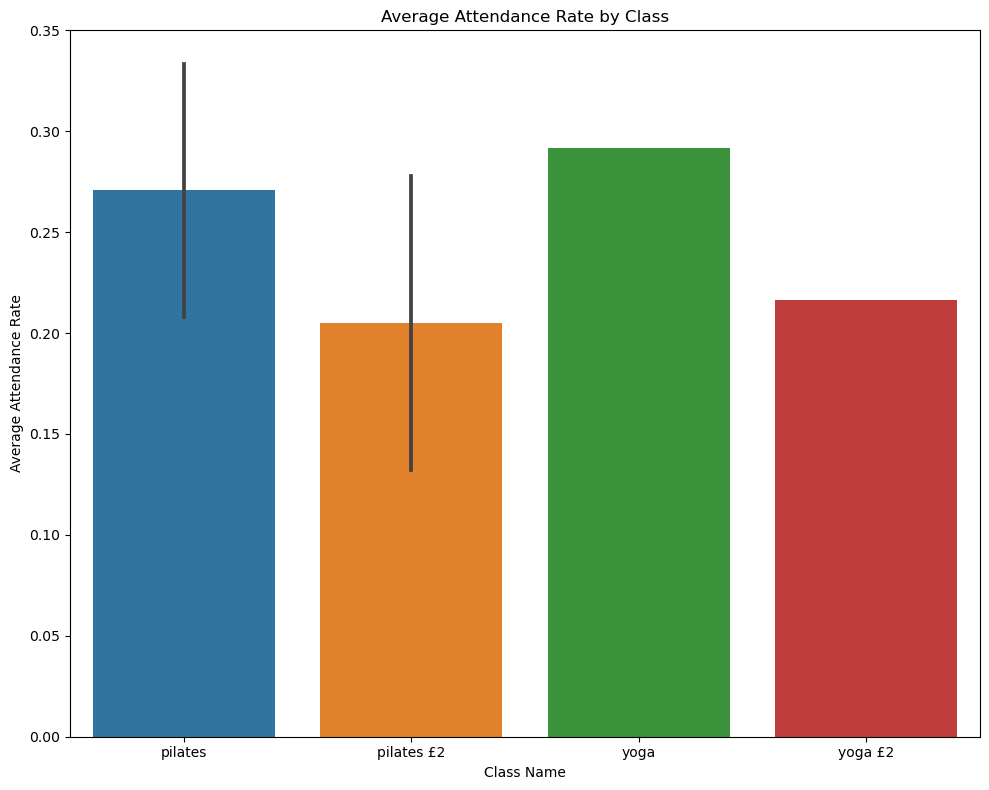

In [ ]:
# Visualization
plt.figure(figsize=(10, 8))

sns.barplot(x='class_name', y='attendance_rate', data=attendance_summary)

plt.title('Average Attendance Rate by Class')
plt.xlabel('Class Name')
plt.ylabel('Average Attendance Rate')
plt.tight_layout()
plt.show()

In [ ]:
# Group by 'booking_id' and 'class_name' to calculate the sum of females, males, and unknowns
attendance_counts = filtered_classes.groupby(['booking_id', 'class_name']).agg({
    'female': 'sum',
    'male': 'sum',
    'unknown': 'sum'
}).reset_index()

# Calculate the total attendance by adding the sum of females, males, and unknowns
attendance_counts['total_attendance'] = attendance_counts['female'] + attendance_counts['male'] + attendance_counts['unknown']

# Now, we get the class capacity for each booking_id (assuming capacity is constant for each booking_id)
# Also, make sure to keep the class_name associated with each booking_id
class_capacities = filtered_classes.drop_duplicates('booking_id')[['booking_id', 'class_name', 'class_capacity']].set_index(['booking_id', 'class_name'])

# Calculate the attendance ratio for each booking_id and class_name
attendance_counts['attendance_ratio'] = attendance_counts.apply(
    lambda row: row['total_attendance'] / class_capacities.loc[(row['booking_id'], row['class_name']), 'class_capacity'], axis=1)

# Now let's print the attendance ratio, associated with each class_name
attendance_ratio_by_class = attendance_counts.pivot(index='booking_id', columns='class_name', values='attendance_ratio')

attendance_ratio_by_class

class_name,pilates,pilates £2,yoga,yoga £2
booking_id,,,,
174book62801,NaN,NaN,0.200000,NaN
174book62802,NaN,NaN,0.633333,NaN
174book62803,NaN,NaN,0.466667,NaN
174book62804,NaN,NaN,0.800000,NaN
174book62805,NaN,NaN,0.566667,NaN
...,...,...,...,...
264book31965,NaN,NaN,NaN,0.500000
264book34961,NaN,NaN,NaN,0.416667
264book34962,NaN,NaN,NaN,0.500000


In [ ]:
# Attended to Cancelled ratio for paid and unpaid classes

# Calculate the ratio of ATTENDED to CANCELLED for each category
status_counts['attended_to_cancelled_ratio'] = status_counts['ATTENDED'] / status_counts['CANCELLED']

# Output the ratio
print(status_counts[['attended_to_cancelled_ratio']])

participation_status  attended_to_cancelled_ratio
class_name                                       
pilates                                  0.863636
pilates £2                               0.928571
yoga                                     0.940000
yoga £2                                  0.882353


Pilates: The ratio of about 0.86 indicates that for every cancellation, there are approximately 0.86 attendees. This suggests that the number of attendees is slightly less than the number of cancellations.

Pilates £2: The ratio is approximately 0.93, which is closer to 1. This suggests that for every person who cancels, there are slightly more attendees, indicating a favorable attendance rate compared to cancellations.

Yoga: With a ratio of 0.94, this suggests that the number of attendees is very close to and slightly less than the number of cancellations, which indicates a strong attendance rate.

Yoga £2: The ratio here is about 0.88, which suggests that for every cancellation, there are approximately 0.88 attendees. This is slightly lower than the ratio for the regular yoga class, indicating that the paid yoga class has a slightly higher cancellation rate compared to attendance.